In [1]:
import numpy as np
from matplotlib import pyplot
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop

from Data.Data import DataLoader

In [2]:
# create an instance of the DataLoader class and initialize 
distortions = ['shot_noise', 'motion_blur']  # desired distortions

# Create instances of the DataLoader class for train and test datasets
train_data_obj = DataLoader('train', distortions)
test_data_obj = DataLoader('test', distortions)

# Load the data for train and test datasets
train_data_dict = train_data_obj.load()
test_data_dict = test_data_obj.load()


2023-06-06 10:33:08.482964: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/erikagutierrez/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


2023-06-06 10:33:10.678214: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/shot_noise/1.0.0.incompleteTBYH0K/mnist_co…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/shot_noise/1.0.0.incompleteTBYH0K/mnist_co…

Dataset mnist_corrupted downloaded and prepared to /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/shot_noise/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/motion_blur/1.0.0.incomplete4CLNO6/mnist_c…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/motion_blur/1.0.0.incomplete4CLNO6/mnist_c…

Dataset mnist_corrupted downloaded and prepared to /Users/erikagutierrez/tensorflow_datasets/mnist_corrupted/motion_blur/1.0.0. Subsequent calls will reuse this data.


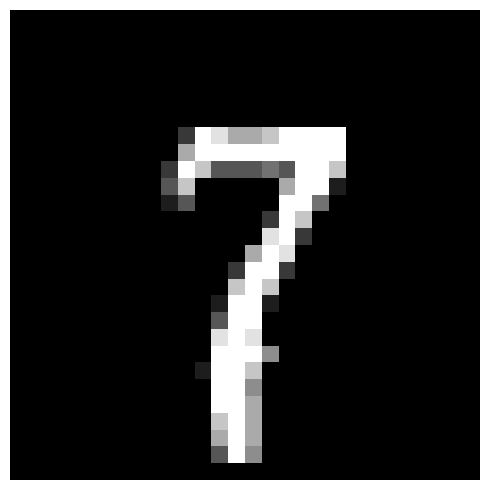

In [8]:
# display an example image
example_image = train_data_dict['clean'][9045]['image']
train_data_obj.display(example_image)

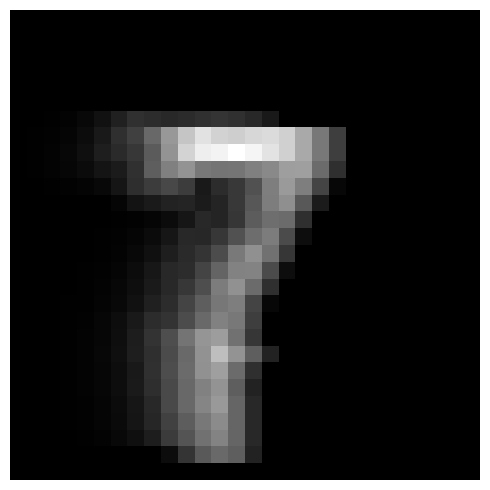

In [20]:
# display an example image
example_image = train_data_dict['motion_blur'][9045]['image']
train_data_obj.display(example_image)

In [4]:
# create train/test datasets
train_size = 1000
test_size = 500

train_ratios = {'clean': 0.8, 'shot_noise': 0.6, 'motion_blur': 0.4}
test_ratios = {'clean': 0.2, 'shot_noise': 0.4, 'motion_blur': 0.6}

train_dataset = train_data_obj.create_dataset(train_size, train_ratios)
test_dataset = test_data_obj.create_dataset(test_size, test_ratios)

In [39]:
# train set
X_train = []
y_train = []

for item in train_dataset:
    X_train.append(item['image'])
    y_train.append(item['label'])

# test set
X_test = []
y_test = []

for item in test_dataset:
    X_test.append(item['image'])
    y_test.append(item['label'])
